## Exercicio 8
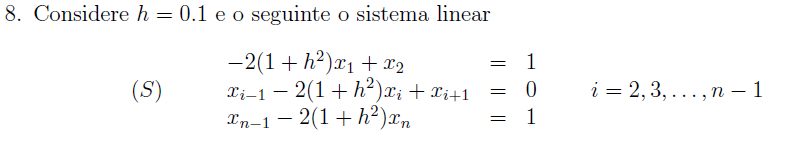

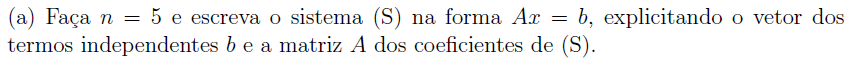

$
\left[
\begin{array}{ccc}
-2(1+h^2) & 1 & 0 & 0 & 0\\
1 & -2(1+h^2) & 1 & 0 & 0\\
0 & 1 & -2(1+h^2) & 1 & 0 \\
0 & 0 & 1 & -2(1+h^2) & 1 \\
0 & 0 & 0 & 1 & -2(1+h^2) 
\end{array}
\right]
\mathit{x = }
\left[
\begin{array}{ccc}
1 \\
0 \\
0 \\
0 \\
1 
\end{array}
\right]
$

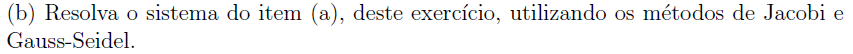

In [1]:
import numpy as np
import copy 

In [2]:
def Jacobi(A,b,p,printa):
    AIdent = np.identity(len(A))
    D = copy.deepcopy(A)*copy.deepcopy(AIdent)
    #print(D)
    InvD = np.linalg.inv(copy.deepcopy(D))
    #print(InvD)
    B = copy.deepcopy(AIdent) - np.dot(copy.deepcopy(InvD),copy.deepcopy(A))
    #print(B)
    g = np.dot(InvD,b)
    #print(g)

    x = np.zeros(len(b))
    it = 0
    while True:
        it+=1
        xOld = x
        x = np.dot(B,x) + g
        Er = np.max(np.abs(x-xOld)/np.max(np.abs(x)))
        Residuo = np.max(np.abs(np.dot(A,x) - b))
        if printa : print(x,Er,it,Residuo)
        if Residuo==0 or Er == 0:
            print('**',x,Er,it)
            break

In [3]:
def GaussSeidel(A,b,p,printa):
    AIdent = np.identity(len(A))
    D = copy.deepcopy(A)*copy.deepcopy(AIdent)
    #print("D \n ",D)
    InvD = np.linalg.inv(copy.deepcopy(D))
    #print("InvD \n ",InvD)
    B = copy.deepcopy(AIdent) - np.dot(copy.deepcopy(InvD),copy.deepcopy(A))
    #print("B \n ",B)
    d = np.dot(InvD,b)
    #print("d \n", d)
    x = np.ones(len(b))
    it = 0
    while True:
        it+=1
        xOld = copy.deepcopy(x)
        for i in range(len(x)):
            x[i] = np.dot(B[i],x) + d[i]
            #print(x[i])
        Er = np.max(np.abs(x-xOld)/np.max(np.abs(x)))
        Residuo = np.max(np.abs(np.dot(A,x) - b))        
        if printa : print("x=",x,"Erro = ",Er,"it=", it,"Residuo= ",Residuo)
        if Residuo==0 or Er == 0:
            print('**',x,Er,it)
            break

In [4]:
def SOR(A,b,p,printa,w):
    m,n = A.shape
    x = np.zeros(len(b))
    it = 0
    while True:
        #print(A,x,b)
        it+=1
        xOld = copy.deepcopy(x)

        for i in range(m):
            s1 = 0
            s2 = 0
            for j in range(i):

                #print("S1 - A[i][j] = ",A[i][j],"x[j]=",x[j],i,j)
                s1 += np.dot(A[i][j],x[j])

            for j in range(i,n):

                #print("S2 - A[i][j] = ",A[i][j],"x[j]=",x[j],i,j)
                s2 += np.dot(A[i][j],xOld[j])     

            x[i] = xOld[i] + np.dot((w/A[i][i]),(b[i]-s1-s2))

        Er = np.max(np.abs(x-xOld)/np.max(np.abs(x)))
        Residuo = np.max(np.abs(np.dot(A,x) - b))        
        if printa : print("x=",x,"Erro = ",Er,"it=", it,"Residuo= ",Residuo)
        if Residuo==0 or Er == 0 or it == 1000:
            print('**',"x=",x,"Er=",Er,"it=",it,"Residuo= ",Residuo)
            break    

In [5]:
h = 0.1
A = np.array([
             [-2*(1+ h**2),1,0,0,0],
             [1,-2*(1+ h**2),1,0,0],
             [0,1,-2*(1+ h**2),1,0],
             [0,0,1,-2*(1+ h**2),1],
             [0,0,0,1,-2*(1+ h**2)],
             ])
b=np.array([1,0,0,0,1])
p=4
print(A,"\n",b)

[[-2.02  1.    0.    0.    0.  ]
 [ 1.   -2.02  1.    0.    0.  ]
 [ 0.    1.   -2.02  1.    0.  ]
 [ 0.    0.    1.   -2.02  1.  ]
 [ 0.    0.    0.    1.   -2.02]] 
 [1 0 0 0 1]


In [6]:
Jacobi(A,b,p,False)

** [-0.95325897 -0.92558312 -0.91641893 -0.92558312 -0.95325897] 0.0 234


In [7]:
GaussSeidel(A,b,p,False)

** [-0.95325897 -0.92558312 -0.91641893 -0.92558312 -0.95325897] 0.0 120


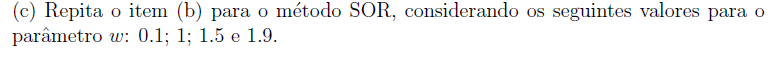

In [8]:
 SOR(A,b,p,False,0.1)

** x= [-0.95325879 -0.92558281 -0.91641858 -0.92558282 -0.9532588 ] Er= 5.574065950031793e-09 it= 1000 Residuo=  1.011671757478183e-07


In [9]:
 SOR(A,b,p,False,1)

** x= [-0.95325897 -0.92558312 -0.91641893 -0.92558312 -0.95325897] Er= 0.0 it= 119 Residuo=  1.1102230246251565e-16


In [10]:
 SOR(A,b,p,False,1.5)

** x= [-0.95325897 -0.92558312 -0.91641893 -0.92558312 -0.95325897] Er= 1.1646604550692842e-16 it= 55 Residuo=  0.0


In [11]:
 SOR(A,b,p,False,1.9)

** x= [-0.95325897 -0.92558312 -0.91641893 -0.92558312 -0.95325897] Er= 6.987962730415707e-16 it= 1000 Residuo=  7.771561172376096e-16


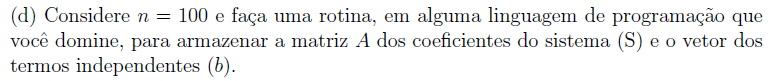

In [12]:
A = np.array([0.0]*100**2).reshape(100,100)
b = np.zeros(100)
b[0] = 1
b[len(b)-1]=1
h = 0.1
for i in range(100):
    for j in range(100):
        if j == i-1:   
            A[i][j]=1
        elif j == i:
            A[i][j]= -2.02
        elif j == i+1:
            A[i][j]=1
        else:
            A[i][j] = 0
    



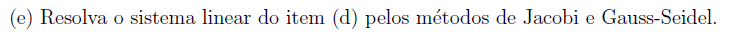

In [13]:
Jacobi(A,b,p,False)

** [-0.86822571 -0.75381594 -0.65448248 -0.56823867 -0.49335964 -0.4283478
 -0.37190292 -0.32289609 -0.28034719 -0.24340522 -0.21133137 -0.18348414
 -0.15930659 -0.13831518 -0.12009007 -0.10426676 -0.09052879 -0.07860139
 -0.06824602 -0.05925557 -0.05145023 -0.0446739  -0.03879104 -0.03368401
 -0.02925065 -0.02540231 -0.02206202 -0.01916296 -0.01664716 -0.01446431
 -0.01257075 -0.01092859 -0.00950501 -0.00827153 -0.00720349 -0.00627951
 -0.00548112 -0.00479235 -0.00419943 -0.0036905  -0.00325538 -0.00288537
 -0.00257306 -0.00231222 -0.00209762 -0.00192497 -0.00179082 -0.00169249
 -0.00162801 -0.00159609 -0.00159609 -0.00162801 -0.00169249 -0.00179082
 -0.00192497 -0.00209762 -0.00231222 -0.00257306 -0.00288537 -0.00325538
 -0.0036905  -0.00419943 -0.00479235 -0.00548112 -0.00627951 -0.00720349
 -0.00827153 -0.00950501 -0.01092859 -0.01257075 -0.01446431 -0.01664716
 -0.01916296 -0.02206202 -0.02540231 -0.02925065 -0.03368401 -0.03879104
 -0.0446739  -0.05145023 -0.05925557 -0.06824602 

In [14]:
GaussSeidel(A,b,p,False)

** [-0.86822571 -0.75381594 -0.65448248 -0.56823867 -0.49335964 -0.4283478
 -0.37190292 -0.32289609 -0.28034719 -0.24340522 -0.21133137 -0.18348414
 -0.15930659 -0.13831518 -0.12009007 -0.10426676 -0.09052879 -0.07860139
 -0.06824602 -0.05925557 -0.05145023 -0.0446739  -0.03879104 -0.03368401
 -0.02925065 -0.02540231 -0.02206202 -0.01916296 -0.01664716 -0.01446431
 -0.01257075 -0.01092859 -0.00950501 -0.00827153 -0.00720349 -0.00627951
 -0.00548112 -0.00479235 -0.00419943 -0.0036905  -0.00325538 -0.00288537
 -0.00257306 -0.00231222 -0.00209762 -0.00192497 -0.00179082 -0.00169249
 -0.00162801 -0.00159609 -0.00159609 -0.00162801 -0.00169249 -0.00179082
 -0.00192497 -0.00209762 -0.00231222 -0.00257306 -0.00288537 -0.00325538
 -0.0036905  -0.00419943 -0.00479235 -0.00548112 -0.00627951 -0.00720349
 -0.00827153 -0.00950501 -0.01092859 -0.01257075 -0.01446431 -0.01664716
 -0.01916296 -0.02206202 -0.02540231 -0.02925065 -0.03368401 -0.03879104
 -0.0446739  -0.05145023 -0.05925557 -0.06824602 

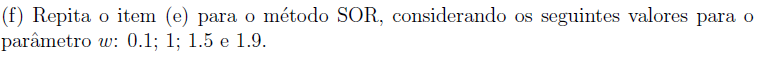

In [15]:
 SOR(A,b,p,False,0.1)

** x= [-8.61723707e-01 -7.40958914e-01 -6.35544998e-01 -5.43612643e-01
 -4.63540105e-01 -3.93915473e-01 -3.33504367e-01 -2.81222572e-01
 -2.36113102e-01 -1.97327186e-01 -1.64108714e-01 -1.35781636e-01
 -1.11739856e-01 -9.14391730e-02 -7.43908577e-02 -6.01564863e-02
 -4.83437072e-02 -3.86026659e-02 -3.06228667e-02 -2.41303017e-02
 -1.88847275e-02 -1.46770141e-02 -1.13265229e-02 -8.67850551e-03
 -6.60152969e-03 -4.98495717e-03 -3.73650152e-03 -2.77989851e-03
 -2.05271740e-03 -1.50433734e-03 -1.09410581e-03 -7.89689159e-04
 -5.65617571e-04 -4.02021035e-04 -2.83547066e-04 -1.98447327e-04
 -1.37817406e-04 -9.49726124e-05 -6.49421867e-05 -4.40647169e-05
 -2.96685701e-05 -1.98225758e-05 -1.31438670e-05 -8.65154590e-06
 -5.65658106e-06 -3.67998506e-06 -2.39281878e-06 -1.57289352e-06
 -1.07419544e-06 -8.06047912e-07 -7.19879623e-07 -8.02209637e-07
 -1.07312988e-06 -1.59019952e-06 -2.45830415e-06 -3.84671652e-06
 -6.01536582e-06 -9.35321759e-06 -1.44327205e-05 -2.20855181e-05
 -3.35060653e-05 -5

In [16]:
 SOR(A,b,p,False,1)

** x= [-0.86822571 -0.75381594 -0.65448248 -0.56823867 -0.49335964 -0.4283478
 -0.37190292 -0.32289609 -0.28034719 -0.24340522 -0.21133137 -0.18348414
 -0.15930659 -0.13831518 -0.12009007 -0.10426676 -0.09052879 -0.07860139
 -0.06824602 -0.05925557 -0.05145023 -0.0446739  -0.03879104 -0.03368401
 -0.02925065 -0.02540231 -0.02206202 -0.01916296 -0.01664716 -0.01446431
 -0.01257075 -0.01092859 -0.00950501 -0.00827153 -0.00720349 -0.00627951
 -0.00548112 -0.00479235 -0.00419943 -0.0036905  -0.00325538 -0.00288537
 -0.00257306 -0.00231222 -0.00209762 -0.00192497 -0.00179082 -0.00169249
 -0.00162801 -0.00159609 -0.00159609 -0.00162801 -0.00169249 -0.00179082
 -0.00192497 -0.00209762 -0.00231222 -0.00257306 -0.00288537 -0.00325538
 -0.0036905  -0.00419943 -0.00479235 -0.00548112 -0.00627951 -0.00720349
 -0.00827153 -0.00950501 -0.01092859 -0.01257075 -0.01446431 -0.01664716
 -0.01916296 -0.02206202 -0.02540231 -0.02925065 -0.03368401 -0.03879104
 -0.0446739  -0.05145023 -0.05925557 -0.068246

In [17]:
SOR(A,b,p,False,1.5)

** x= [-0.86822571 -0.75381594 -0.65448248 -0.56823867 -0.49335964 -0.4283478
 -0.37190292 -0.32289609 -0.28034719 -0.24340522 -0.21133137 -0.18348414
 -0.15930659 -0.13831518 -0.12009007 -0.10426676 -0.09052879 -0.07860139
 -0.06824602 -0.05925557 -0.05145023 -0.0446739  -0.03879104 -0.03368401
 -0.02925065 -0.02540231 -0.02206202 -0.01916296 -0.01664716 -0.01446431
 -0.01257075 -0.01092859 -0.00950501 -0.00827153 -0.00720349 -0.00627951
 -0.00548112 -0.00479235 -0.00419943 -0.0036905  -0.00325538 -0.00288537
 -0.00257306 -0.00231222 -0.00209762 -0.00192497 -0.00179082 -0.00169249
 -0.00162801 -0.00159609 -0.00159609 -0.00162801 -0.00169249 -0.00179082
 -0.00192497 -0.00209762 -0.00231222 -0.00257306 -0.00288537 -0.00325538
 -0.0036905  -0.00419943 -0.00479235 -0.00548112 -0.00627951 -0.00720349
 -0.00827153 -0.00950501 -0.01092859 -0.01257075 -0.01446431 -0.01664716
 -0.01916296 -0.02206202 -0.02540231 -0.02925065 -0.03368401 -0.03879104
 -0.0446739  -0.05145023 -0.05925557 -0.068246

In [18]:
SOR(A,b,p,False,1.9)

** x= [-0.86822571 -0.75381594 -0.65448248 -0.56823867 -0.49335964 -0.4283478
 -0.37190292 -0.32289609 -0.28034719 -0.24340522 -0.21133137 -0.18348414
 -0.15930659 -0.13831518 -0.12009007 -0.10426676 -0.09052879 -0.07860139
 -0.06824602 -0.05925557 -0.05145023 -0.0446739  -0.03879104 -0.03368401
 -0.02925065 -0.02540231 -0.02206202 -0.01916296 -0.01664716 -0.01446431
 -0.01257075 -0.01092859 -0.00950501 -0.00827153 -0.00720349 -0.00627951
 -0.00548112 -0.00479235 -0.00419943 -0.0036905  -0.00325538 -0.00288537
 -0.00257306 -0.00231222 -0.00209762 -0.00192497 -0.00179082 -0.00169249
 -0.00162801 -0.00159609 -0.00159609 -0.00162801 -0.00169249 -0.00179082
 -0.00192497 -0.00209762 -0.00231222 -0.00257306 -0.00288537 -0.00325538
 -0.0036905  -0.00419943 -0.00479235 -0.00548112 -0.00627951 -0.00720349
 -0.00827153 -0.00950501 -0.01092859 -0.01257075 -0.01446431 -0.01664716
 -0.01916296 -0.02206202 -0.02540231 -0.02925065 -0.03368401 -0.03879104
 -0.0446739  -0.05145023 -0.05925557 -0.068246

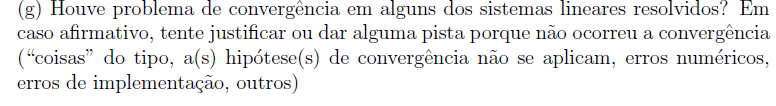

Não, todos foram resolvidos. Alguns não chegaram ao resultado exato provavelmente por problema de erro computacional,ou seja, arredondamentos do proprio sistema como por exemplo erros de pontos flutuantes